### Training part

In [1]:
import pandas as pd
df = pd.read_csv('../Dataset/drug200.csv', sep = ",") #where ..means 2 folders back to aim file
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


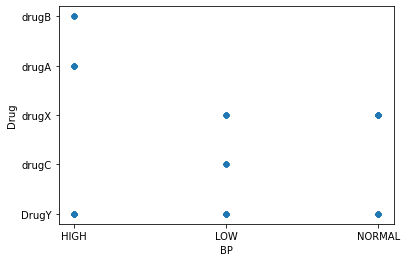

In [2]:
df.plot.scatter(x ='BP', y ='Drug');

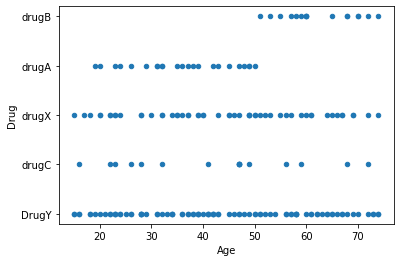

In [3]:
df.plot.scatter(x ='Age', y ='Drug');

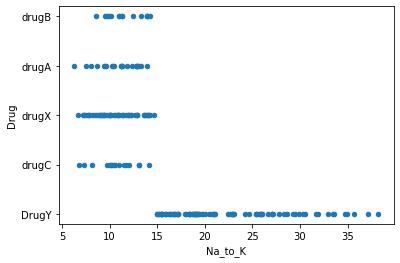

In [4]:
df.plot.scatter(x ='Na_to_K', y ='Drug');

In [5]:
df.sort_values(by = 'BP').head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
125,19,F,HIGH,NORMAL,25.969,DrugY
124,53,F,HIGH,NORMAL,12.495,drugB
121,15,M,HIGH,NORMAL,17.206,DrugY
119,61,F,HIGH,HIGH,25.475,DrugY
118,32,F,HIGH,NORMAL,10.292,drugA
115,51,M,HIGH,HIGH,18.295,DrugY
110,50,M,HIGH,HIGH,7.490,drugA
108,72,M,HIGH,NORMAL,9.677,drugB
104,22,M,HIGH,NORMAL,28.294,DrugY


### Age - Age of the Patient
### Sex - Gender of the patients
### BP - Blood Pressure Levels
### Cholesterol - Cholesterol Levels (Уровень холестерина)
### Na_to_K - Sodium to potassium Ration in Blood (Соотношение натрия и калия в крови)
### Drug - Drug Type

In [2]:
df.shape

(200, 6)

In [3]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [4]:
lst_columns = df.columns.values.tolist()
lst_columns

['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']

In [5]:
# it is to have a list of columns which contains isnull
c = 0
for i in lst_columns:
    isnull = df[i].isnull().sum()
    if isnull !=0:
        c += 1
        print(i, end = ',')

In [10]:
# the previous 5th cell means we dont have isnull

In [6]:
len(df['Drug'].unique())

5

In [7]:
df['Na_to_K'].isnull().sum()

0

In [8]:
df['Sex'] = df['Sex'].map({'F': 0, 'M': 1})
df['BP'] = df['BP'].map({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})
df['Cholesterol'] = df['Cholesterol'].map({'NORMAL': 0, 'HIGH': 1})
df['Drug'] = df['Drug'].map({'drugA': 0, 'drugB': 1, 'drugC': 2,'drugX': 3, 'DrugY': 4})

In [14]:
df['Sex'].value_counts()

1    104
0     96
Name: Sex, dtype: int64

### column 'drug' is our Y

In [9]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,4
1,47,1,0,1,13.093,2
2,47,1,0,1,10.114,2
3,28,0,1,1,7.798,3
4,61,0,0,1,18.043,4
...,...,...,...,...,...,...
195,56,0,0,1,11.567,2
196,16,1,0,1,12.006,2
197,52,1,1,1,9.894,3
198,23,1,1,0,14.020,3


In [10]:
df.describe()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.520000,1.065000,0.515000,16.084485,2.870000
std,16.544315,0.500854,0.839224,0.501029,7.223956,1.372047
min,15.000000,0.000000,0.000000,0.000000,6.269000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,10.445500,2.000000
50%,45.000000,1.000000,1.000000,1.000000,13.936500,3.000000
75%,58.000000,1.000000,2.000000,1.000000,19.380000,4.000000
max,74.000000,1.000000,2.000000,1.000000,38.247000,4.000000


In [17]:
# df[df['Sex'] == 0].info()

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# df.plot.scatter(x ='BP', y ='Drug');

In [12]:
X = df.copy()
y = X.pop('Drug')

In [13]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,2,1,25.355
1,47,1,0,1,13.093
2,47,1,0,1,10.114
3,28,0,1,1,7.798
4,61,0,0,1,18.043


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [27]:
# X2 = df[['Age', 'Sex', 'BP']]
# y2 = df['Drug']

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
Log_Reg = LogisticRegression()
Log_Reg.fit(X_train, y_train)

C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
Log_Reg.score(X_train, y_train), Log_Reg.score(X_test, y_test) 

(0.925, 0.85)

In [103]:
Log_Reg.predict_proba(X_test)

array([[6.40621128e-05, 3.66620937e-03, 4.81585749e-01, 4.81729560e-01,
        3.29544199e-02],
       [2.68604986e-01, 3.39035358e-01, 3.05243069e-03, 1.58280640e-01,
        2.31026586e-01],
       [1.98823241e-08, 4.92654423e-06, 4.92583450e-03, 6.89060327e-02,
        9.26163186e-01],
       [9.70782777e-02, 4.59466984e-02, 9.62536586e-02, 5.71150417e-01,
        1.89570948e-01],
       [1.57275217e-01, 7.31057127e-04, 4.18061743e-05, 2.58948290e-02,
        8.16057091e-01],
       [4.42234785e-03, 1.38981407e-01, 5.82227886e-03, 7.97180615e-01,
        5.35933512e-02],
       [5.13548761e-01, 4.07037865e-01, 7.58714488e-05, 7.30863134e-02,
        6.25118944e-03],
       [3.71368029e-03, 3.15905421e-02, 6.39797220e-02, 5.36311011e-01,
        3.64405044e-01],
       [1.16703462e-01, 8.08259321e-01, 9.40894448e-04, 6.34866234e-02,
        1.06096989e-02],
       [1.40450862e-01, 5.80477539e-01, 2.04828486e-03, 1.76712653e-01,
        1.00310660e-01],
       [8.21304338e-02, 8.7760

In [19]:
Log_Reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [39]:
# to solve the problem of Randomness during train_test_split: 
mean_score_list = []
for i in range (1, 300):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    mean_score_list.append(model.score(X_test, y_test))
    
# to see the result of the iteration above    
import numpy as np
model_score = np.array(mean_score_list).mean()
model_score

C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8903010033444818

In [40]:
model_score

0.8903010033444818

In [20]:
from sklearn.metrics import confusion_matrix

In [23]:
y_pred_log = Log_Reg.predict(X_test)  

In [113]:
y_pred_log

array([2, 4, 4, 3, 4, 3, 0, 3, 1, 1, 1, 3, 3, 4, 3, 4, 4, 3, 3, 0, 4, 2,
       3, 3, 4, 0, 2, 3, 2, 4, 0, 2, 0, 0, 1, 0, 4, 3, 1, 3], dtype=int64)

In [24]:
confusion_matrix(y_test, y_pred_log)

array([[ 5,  0,  0,  0,  0],
       [ 1,  5,  0,  0,  1],
       [ 0,  0,  4,  1,  0],
       [ 0,  0,  0, 11,  0],
       [ 1,  0,  1,  1,  9]], dtype=int64)

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [50]:
print('Logistic Regression Precision score:', precision_score(y_test, y_pred_log, average = 'weighted'))
print('Logistic Regression recall score:', recall_score(y_test, y_pred_log, average = 'weighted'))
print('Logistic Regression f1_score:', f1_score(y_test, y_pred_log, average = 'weighted'))

Logistic Regression Precision score: 0.866978021978022
Logistic Regression recall score: 0.85
Logistic Regression f1_score: 0.8475378787878787


In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [52]:
Tree = DecisionTreeClassifier()
Tree.fit(X_train, y_train)
Tree.score(X_train, y_train), Tree.score(X_test, y_test) 

(1.0, 0.975)

In [43]:
Tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [44]:
r = export_text(Tree, feature_names = list(X))
print(r)
# it gives entropy text

|--- Na_to_K <= 14.64
|   |--- BP <= 1.50
|   |   |--- Cholesterol <= 0.50
|   |   |   |--- class: 3
|   |   |--- Cholesterol >  0.50
|   |   |   |--- BP <= 0.50
|   |   |   |   |--- class: 2
|   |   |   |--- BP >  0.50
|   |   |   |   |--- class: 3
|   |--- BP >  1.50
|   |   |--- Age <= 51.50
|   |   |   |--- class: 0
|   |   |--- Age >  51.50
|   |   |   |--- class: 1
|--- Na_to_K >  14.64
|   |--- class: 4



In [53]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [56]:
# # to see tree
# plt.figure(figsize = (15, 10))
# Tree.plot_tree(model, filled = True)

In [59]:
# to work with RandomizedSearchCV in train_test_split
from sklearn.model_selection import RandomizedSearchCV

# for tree as a template: 
max_depth = [3, 7, 12, 18, 30, 40, 60, 100]
min_samples_leaf = [1, 2, 4, 6]
min_samples_split = [2, 5, 7, 9, 11]
K_fold = 7

params_table = {'max_depth': max_depth,
              'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split}

RS = RandomizedSearchCV(estimator = Tree,
                        param_distributions = params_table,
                        n_iter = 100,
                        cv = 7,
                        n_jobs = -1)



In [60]:
%%time
RS.fit(X_train, y_train)
RS.best_params_

Wall time: 7.59 s


{'min_samples_split': 7, 'min_samples_leaf': 4, 'max_depth': 7}

In [62]:
# should enter the best_params found above in RST
Tree = DecisionTreeClassifier(min_samples_split = 7,
                 min_samples_leaf = 4,
                 max_depth = 7)
Tree.fit(X_train, y_train)
Tree.score(X_train, y_train), Tree.score(X_test, y_test)

(1.0, 0.95)

In [54]:
Tree.feature_importances_

array([0.11304757, 0.        , 0.32482802, 0.04897333, 0.51315108])

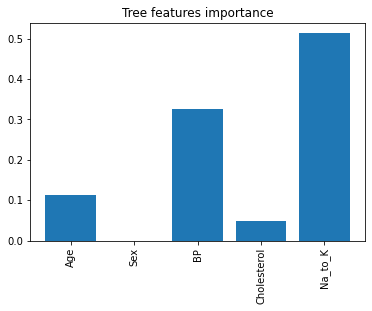

In [55]:
import matplotlib.pyplot as plt

impact = Tree.feature_importances_
values = X_train.columns.values

plt.figure()
plt.title('Tree features importance')
plt.bar(range(X_train.shape[1]), impact) # bar is because it is of good use for categoric data
plt.xticks(range(X_train.shape[1]), values, rotation = 90);
# plt.show(); this is not necessery 

In [56]:
y_pred_Tree = Tree.predict(X_test)  

In [57]:
confusion_matrix(y_test, y_pred_Tree)

array([[ 5,  0,  0,  0,  0],
       [ 1,  6,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  0, 11,  0],
       [ 0,  0,  0,  0, 12]], dtype=int64)

In [62]:
print('Tree Precision score:', precision_score(y_test, y_pred_Tree, average = 'weighted'))
print('Tree recall score:', recall_score(y_test, y_pred_Tree, average = 'weighted'))
print('Tree f1_score:', f1_score(y_test, y_pred_Tree, average = 'weighted'))

Tree Precision score: 0.9791666666666667
Tree recall score: 0.975
Tree f1_score: 0.9751748251748251


In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
RFC.score(X_train, y_train), RFC.score(X_test, y_test) 

(1.0, 0.975)

In [67]:
RFC.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [66]:
y_pred_RFC = RFC.predict(X_test)  

In [67]:
confusion_matrix(y_test, y_pred_RFC)

array([[ 5,  0,  0,  0,  0],
       [ 1,  6,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  0, 11,  0],
       [ 0,  0,  0,  0, 12]], dtype=int64)

In [68]:
print('RFC Precision score:', precision_score(y_test, y_pred_RFC, average = 'weighted'))
print('RFC recall score:', recall_score(y_test, y_pred_RFC, average = 'weighted'))
print('RFC f1_score:', f1_score(y_test, y_pred_RFC, average = 'weighted'))

RFC Precision score: 0.9791666666666667
RFC recall score: 0.975
RFC f1_score: 0.9751748251748251


In [70]:
from sklearn.metrics import classification_report

In [72]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.71      0.83         7
           2       0.80      0.80      0.80         5
           3       0.85      1.00      0.92        11
           4       0.90      0.75      0.82        12

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.84        40
weighted avg       0.87      0.85      0.85        40



In [73]:
print(classification_report(y_test, y_pred_Tree))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.86      0.92         7
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        12

    accuracy                           0.97        40
   macro avg       0.97      0.97      0.97        40
weighted avg       0.98      0.97      0.98        40



In [74]:
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.86      0.92         7
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        12

    accuracy                           0.97        40
   macro avg       0.97      0.97      0.97        40
weighted avg       0.98      0.97      0.98        40



In [75]:
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)
GBC.score(X_train, y_train), GBC.score(X_test, y_test) 

(1.0, 0.975)

In [77]:
GBC.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [78]:
GBC.feature_importances_

array([0.0612684 , 0.        , 0.21250213, 0.05261101, 0.67361846])

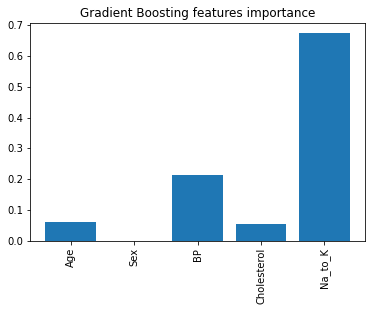

In [79]:
import matplotlib.pyplot as plt

impact = GBC.feature_importances_
values = X_train.columns.values

plt.figure()
plt.title('Gradient Boosting features importance')
plt.bar(range(X_train.shape[1]), impact) # bar is because it is of good use for categoric data
plt.xticks(range(X_train.shape[1]), values, rotation = 90);
# plt.show(); this is not necessery 

In [80]:
y_pred_GBC = GBC.predict(X_test)  

In [81]:
confusion_matrix(y_test,y_pred_GBC)

array([[ 5,  0,  0,  0,  0],
       [ 1,  6,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  0, 11,  0],
       [ 0,  0,  0,  0, 12]], dtype=int64)

In [82]:
print(classification_report(y_test, y_pred_GBC))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.86      0.92         7
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        12

    accuracy                           0.97        40
   macro avg       0.97      0.97      0.97        40
weighted avg       0.98      0.97      0.98        40



### Testing part

In [83]:
import pandas as pd
df = pd.read_csv('../Dataset/drug200.csv', sep = ",") #where ..means 2 folders back to aim file
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [84]:
df.shape

(200, 6)

In [85]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [86]:
df['Sex'] = df['Sex'].map({'F': 0, 'M': 1})
df['BP'] = df['BP'].map({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})
df['Cholesterol'] = df['Cholesterol'].map({'NORMAL': 0, 'HIGH': 1})
df['Drug'] = df['Drug'].map({'drugA': 0, 'drugB': 1, 'drugC': 2,'drugX': 3, 'DrugY': 4})

In [87]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,4
1,47,1,0,1,13.093,2
2,47,1,0,1,10.114,2
3,28,0,1,1,7.798,3
4,61,0,0,1,18.043,4
...,...,...,...,...,...,...
195,56,0,0,1,11.567,2
196,16,1,0,1,12.006,2
197,52,1,1,1,9.894,3
198,23,1,1,0,14.020,3


In [88]:
X = df.copy()
y = X.pop('Drug')

In [89]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,2,1,25.355
1,47,1,0,1,13.093
2,47,1,0,1,10.114
3,28,0,1,1,7.798
4,61,0,0,1,18.043


In [90]:
Log_Reg

LogisticRegression()

In [97]:
Log_Reg.fit(X, y)
Log_Reg.score(X, y)

C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.91

In [91]:
Tree

DecisionTreeClassifier()

In [94]:
Tree.fit(X, y)
Tree.score(X, y)

1.0

In [92]:
RFC

RandomForestClassifier()

In [95]:
RFC.fit(X, y)
RFC.score(X, y)

1.0

In [93]:
GBC

GradientBoostingClassifier()

In [96]:
GBC.fit(X, y)
GBC.score(X, y)

1.0

In [98]:
# I will pickle Random Forest as one of the best tree models for tabular data since all models 
# except logistis Regression score 1.0 (Log_Reg is 0.91)

In [99]:
import pickle

In [100]:
pickle.dump(RFC, open('model.pkl', 'wb'))

In [101]:
# pickle.load(open('model.pkl', 'rb'))
RFC_test = pickle.load(open('model.pkl', 'rb'))

In [102]:
RFC_test

RandomForestClassifier()

In [104]:
RFC_predict = RFC_test.predict(X)

In [105]:
Age = X['Age']

In [106]:
RFC_final = pd.DataFrame({'Age': X['Age'],
                       'Drug': RFC_predict})
RFC_final.to_csv('Mirbek_RFC_Predict.csv', index = False)

In [109]:
df = pd.read_csv('Mirbek_RFC_Predict.csv', sep = ",") #where ..means 2 folders back to aim file
df.head(10)

,Age,Drug
0,23,4
1,47,2
2,47,2
3,28,3
4,61,4
5,22,3
6,49,4
7,41,2
8,60,4
9,43,4


In [110]:
df.shape

(200, 2)

In [120]:
df['Drug']

0      4
1      2
2      2
3      3
4      4
      ..
195    2
196    2
197    3
198    3
199    3
Name: Drug, Length: 200, dtype: int64

In [131]:
# Drug_test = list(df['Drug'])
# Drug_test

In [126]:
y_pred_all_RFC = RFC.predict(X)  

In [128]:
len(y_pred_all_RFC)

200

In [132]:
correct = 0

for i in range(len(y_pred_all_RFC)):
    if y_pred_all_RFC[i] == Drug_test[i]:
        Drug_test[i] == 'correct'
    else:
        Drug_test[i] == 'Incorrect'
        
print(Drug_test)

[4, 2, 2, 3, 4, 3, 4, 2, 4, 4, 2, 4, 4, 4, 3, 4, 3, 0, 2, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 3, 1, 3, 4, 3, 3, 0, 3, 3, 3, 4, 1, 4, 3, 3, 3, 0, 2, 4, 4, 4, 3, 4, 4, 1, 2, 1, 4, 3, 4, 4, 0, 4, 3, 1, 4, 0, 3, 4, 4, 1, 4, 3, 4, 4, 4, 0, 4, 0, 3, 1, 3, 2, 0, 2, 1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 0, 0, 2, 3, 4, 3, 3, 4, 1, 4, 0, 3, 3, 3, 3, 4, 3, 3, 0, 4, 4, 4, 4, 4, 1, 4, 4, 3, 4, 3, 4, 4, 3, 4, 4, 3, 1, 0, 1, 3, 0, 4, 1, 4, 0, 3, 3, 0, 3, 2, 0, 1, 3, 3, 4, 2, 0, 4, 2, 3, 3, 1, 3, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 4, 0, 4, 0, 4, 4, 4, 4, 3, 3, 4, 4, 4, 1, 0, 4, 4, 4, 0, 4, 2, 4, 2, 2, 3, 3, 3]
